In [ ]:

# Load arrays into a dictionary
path = r"C:\Users\helsa\Documents\AP3751\lung_cts\lung_cts"
array_dict = {}
for file in os.listdir(path):
    if file.endswith(".npy"):
        array = np.load(os.path.join(path, file))
        array_dict[file] = array

# Function to display a slice of the array
def display_slice(array, slice_index):
    plt.imshow(array[slice_index, :, :], cmap='gray')
    plt.title(f'Slice {slice_index}')
    plt.axis('off')
    plt.show()

# Create an interactive widget for plotting slices
def interactive_plot(filename):
    array = array_dict[filename]
    max_slices = array.shape[0] - 1
    
    slice_slider = widgets.IntSlider(value=0, min=0, max=max_slices, step=1, description='Slice:')
    
    ui = widgets.VBox([slice_slider])
    
    def update_plot(slice_index):
        plt.figure(figsize=(10, 10))
        display_slice(array, slice_index)
    
    out = widgets.interactive_output(update_plot, {'slice_index': slice_slider})
    display(ui, out)

# Example usage
interactive_plot('test_dicom_lung_10.npy')


In [45]:
from src.generator_correct import DataGenerator
import os

In [46]:
path=r"C:\Users\helsa\Documents\AP3751\lung_cts\lung_cts"
listIDs = os.listdir(path)

scale={'x_min':-1000, 'x_max':400}
batch_size=1

In [51]:
DataGenerator(listIDs,batch_size,path,scale).__getitem__(0).shape

(1, 340, 350, 350, 1)

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


In [20]:
path=r"C:\Users\helsa\Documents\AP3751\data_2d\data_2d\file_info.csv"
df=pd.read_csv(path)
df

,File_Name,Origin_File,Origin_Index,Image_Number,Min_Value,Max_Value,Mean_Value
0,img_0_slice_0.npy,test_dicom_lung_0.npy,0,0,-1024,1626,-617.267025
1,img_0_slice_1.npy,test_dicom_lung_0.npy,0,1,-1024,1662,-620.647194
2,img_0_slice_2.npy,test_dicom_lung_0.npy,0,2,-1024,1609,-624.314900
3,img_0_slice_3.npy,test_dicom_lung_0.npy,0,3,-1024,1553,-627.986350
4,img_0_slice_4.npy,test_dicom_lung_0.npy,0,4,-1024,1614,-631.147875
...,...,...,...,...,...,...,...
3843,img_9_slice_290.npy,test_dicom_lung_9.npy,9,290,-1024,2181,-585.879831
3844,img_9_slice_291.npy,test_dicom_lung_9.npy,9,291,-1024,2072,-585.779319
3845,img_9_slice_292.npy,test_dicom_lung_9.npy,9,292,-1024,2203,-585.588387
3846,img_9_slice_293.npy,test_dicom_lung_9.npy,9,293,-1024,2145,-585.447281


In [23]:
df[df['Min_Value']==0]

,File_Name,Origin_File,Origin_Index,Image_Number,Min_Value,Max_Value,Mean_Value
913,img_10_slice_318.npy,test_dicom_lung_10.npy,10,318,0,0,0.0
914,img_10_slice_319.npy,test_dicom_lung_10.npy,10,319,0,0,0.0


In [52]:
filepath=r"C:\Users\helsa\Documents\AP3751\data_2d\data_2d"
data_stats = []

# Process each .npy file
for file in os.listdir(filepath):
    if file.endswith(".npy"):
        array = np.load(os.path.join(filepath, file))
        
        # Apply thresholding
        array[array < -1000] = -1000
        array[array > 3000] = 3000
        
        # Save the modified array back to disk
        np.save(os.path.join(filepath, file), array)
        
        # Collect statistics
        min_val = np.min(array)
        max_val = np.max(array)
        mean_val = np.mean(array)
        
        # Append to the list
        data_stats.append({"filename": file, "min": min_val, "max": max_val, "mean": mean_val})

# Create a DataFrame from the statistics list
df2 = pd.DataFrame(data_stats)

# Display the DataFrame
print(df)

                File_Name            Origin_File  Origin_Index  Image_Number
0       img_0_slice_0.npy  test_dicom_lung_0.npy             0             0
1       img_0_slice_1.npy  test_dicom_lung_0.npy             0             1
2       img_0_slice_2.npy  test_dicom_lung_0.npy             0             2
3       img_0_slice_3.npy  test_dicom_lung_0.npy             0             3
4       img_0_slice_4.npy  test_dicom_lung_0.npy             0             4
...                   ...                    ...           ...           ...
3843  img_9_slice_290.npy  test_dicom_lung_9.npy             9           290
3844  img_9_slice_291.npy  test_dicom_lung_9.npy             9           291
3845  img_9_slice_292.npy  test_dicom_lung_9.npy             9           292
3846  img_9_slice_293.npy  test_dicom_lung_9.npy             9           293
3847  img_9_slice_294.npy  test_dicom_lung_9.npy             9           294

[3848 rows x 4 columns]


In [39]:
df.drop(['Min_Value','Max_Value','Mean_Value'],axis=1,inplace=True)

In [40]:
df

,File_Name,Origin_File,Origin_Index,Image_Number
0,img_0_slice_0.npy,test_dicom_lung_0.npy,0,0
1,img_0_slice_1.npy,test_dicom_lung_0.npy,0,1
2,img_0_slice_2.npy,test_dicom_lung_0.npy,0,2
3,img_0_slice_3.npy,test_dicom_lung_0.npy,0,3
4,img_0_slice_4.npy,test_dicom_lung_0.npy,0,4
...,...,...,...,...
3843,img_9_slice_290.npy,test_dicom_lung_9.npy,9,290
3844,img_9_slice_291.npy,test_dicom_lung_9.npy,9,291
3845,img_9_slice_292.npy,test_dicom_lung_9.npy,9,292
3846,img_9_slice_293.npy,test_dicom_lung_9.npy,9,293


In [41]:
df2.rename(columns={'filename':'File_Name','min':'Min_Value','max':'Max_Value','mean':'Mean_Value'},inplace=True)

In [43]:
df2.merge(df,on='File_Name')

,File_Name,Min_Value,Max_Value,Mean_Value,Origin_File,Origin_Index,Image_Number
0,img_0_slice_0.npy,-1000,1626,-616.259494,test_dicom_lung_0.npy,0,0
1,img_0_slice_1.npy,-1000,1662,-619.778738,test_dicom_lung_0.npy,0,1
2,img_0_slice_10.npy,-1000,1573,-642.908662,test_dicom_lung_0.npy,0,10
3,img_0_slice_100.npy,-1000,1598,-701.168769,test_dicom_lung_0.npy,0,100
4,img_0_slice_101.npy,-1000,1549,-700.135681,test_dicom_lung_0.npy,0,101
...,...,...,...,...,...,...,...
3843,img_9_slice_95.npy,-1000,2749,-641.975425,test_dicom_lung_9.npy,9,95
3844,img_9_slice_96.npy,-1000,2475,-642.151944,test_dicom_lung_9.npy,9,96
3845,img_9_slice_97.npy,-1000,2768,-642.315981,test_dicom_lung_9.npy,9,97
3846,img_9_slice_98.npy,-1000,2602,-642.441394,test_dicom_lung_9.npy,9,98


In [44]:
df2.to_csv(r"C:\Users\helsa\Documents\AP3751\data_2d\data_2d\file_info.csv",index=False)

(400, 400)


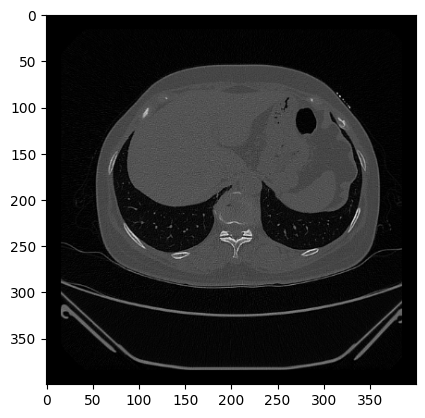

In [35]:
file=r"C:\Users\helsa\Documents\AP3751\data_2d\data_2d\img_9_slice_250.npy"
array=np.load(file)
print(array.shape)
plt.imshow(array,cmap='gray')

In [22]:
df['Min_Value'].value_counts()

Min_Value
-1024    3218
-3024     627
 0          2
-3049       1
Name: count, dtype: int64

In [2]:
path = r"C:\Users\helsa\Documents\AP3751\lung_cts\lung_cts"
array_dict = {}
for file in os.listdir(path):
    if file.endswith(".npy"):
        array = np.load(os.path.join(path, file))
        array_dict[file] = array

In [3]:
import pandas as pd
path = r"C:\Users\helsa\Documents\AP3751\lung_cts\lung_cts"

data = []

for file in os.listdir(path):
    if file.endswith(".npy"):  # Ensure you only process .npy files
        array = np.load(os.path.join(path, file))
        data.append({"filename": file, "shape": array.shape})

df = pd.DataFrame(data)


In [4]:
df

,filename,shape
0,test_dicom_lung_0.npy,"(260, 400, 400)"
1,test_dicom_lung_1.npy,"(335, 375, 375)"
2,test_dicom_lung_10.npy,"(320, 431, 431)"
3,test_dicom_lung_11.npy,"(295, 433, 433)"
4,test_dicom_lung_12.npy,"(340, 350, 350)"
5,test_dicom_lung_13.npy,"(251, 500, 500)"
6,test_dicom_lung_2.npy,"(268, 400, 400)"
7,test_dicom_lung_3.npy,"(226, 400, 400)"
8,test_dicom_lung_4.npy,"(293, 400, 400)"
9,test_dicom_lung_5.npy,"(223, 400, 400)"


In [19]:
def display_slice(array, slice_index):
    plt.imshow(array[slice_index, :, :], cmap='gray')
    plt.title(f'Slice {slice_index}')
    plt.axis('off')
    plt.show()

# Create an interactive widget for plotting slices
def interactive_plot(filename):
    array = array_dict[filename]
    array[array < -1000] = -1000
    max_slices = array.shape[0] - 1
    
    slice_slider = widgets.IntSlider(value=0, min=0, max=max_slices, step=1, description='Slice:')
    
    ui = widgets.VBox([slice_slider])
    
    def update_plot(slice_index):
        plt.figure(figsize=(10, 10))
        display_slice(array, slice_index)
    
    out = widgets.interactive_output(update_plot, {'slice_index': slice_slider})
    display(ui, out)

# Example usage
interactive_plot('test_dicom_lung_8.npy')


Output()

In [ ]:
import cv2


In [7]:
pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.0/38.6 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.1/38.6 MB 558.5 kB/s eta 0:01:10
    --------------------------------------- 0.6/38.6 MB 3.7 MB/s eta 0:00:11
   - -------------------------------------- 1.5/38.6 MB 7.5 MB/s eta 0:00:05
   -- ------------------------------------- 2.4/38.6 MB 9.5 MB/s eta 0:00:04
   --- ------------------------------------ 3.2/38.6 MB 10.8 MB/s eta 0:00:04
   ---- ----------------------------------- 4.1/38.6 MB 12.0 MB/s eta 0:00:03
   ----- ---------------------------------- 5.0/38.6 MB 12.8 MB/s eta 0:00:03
   ------ --------------------------------- 5.9/38.6 MB 13.5 MB/s eta 0:00:03
   ------ --------------------------------- 6.7/38.6 MB 13.9 MB/s eta 0:00:03
   -------- ------------------------------- 7.8/38.6 MB 15.1 MB/s eta 0:00:0

In [8]:
import cv2

In [16]:
from skimage import io, filters, color, morphology
import matplotlib.pyplot as plt
import numpy as np 

image= array_dict['test_dicom_lung_4.npy']
gray = color.rgb2gray(image)
tgray = gray > filters.threshold_otsu(gray)
keep_mask = morphology.remove_small_objects(tgray,min_size=463)
keep_mask = morphology.remove_small_holes(keep_mask)
maskedimg = np.einsum('ijk,ij->ijk',image,keep_mask)

fig,axes = plt.subplots(ncols=3)
image_list = [image,keep_mask,maskedimg]
title_list = ["Original","Mask","Imgage w/mask"]
for i,ax in enumerate(axes):
    ax.imshow(image_list[i])
    ax.set_title(title_list[i])
    ax.axis("off")
fig.tight_layout()

ValueError: the input array must have size 3 along `channel_axis`, got (293, 400, 400)

In [16]:
def load_arrays(path):
    array_dict = {}
    for file in os.listdir(path):
        if file.endswith(".npy"):
            array = np.load(os.path.join(path, file))
            array_dict[file] = array
    return array_dict

def convert_to_binary(image, threshold=127):
    # Ensure the image is in uint8 format
    image = image.astype(np.uint8)
    _, binary = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return binary

def get_largest_contour(binary_image):
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
    else:
        largest_contour = np.array([])
    return largest_contour

def create_mask_from_contour(image_shape, contour):
    mask = np.zeros(image_shape, dtype=np.uint8)
    if contour.size > 0:
        cv2.drawContours(mask, [contour], -1, (255), thickness=cv2.FILLED)
    return mask

def apply_mask_to_original(slice_image, mask):
    # Use the mask to keep only the original values inside the largest contour
    masked_image = np.where(mask == 255, slice_image, -1000)
    return masked_image

def process_image(array, slice_index):
    slice_image = array[slice_index, :, :]
    binary_image = convert_to_binary(slice_image)
    largest_contour = get_largest_contour(binary_image)
    mask = create_mask_from_contour(slice_image.shape, largest_contour)
    masked_image = apply_mask_to_original(slice_image, mask)
    return masked_image

def display_image_with_mask(array, slice_index):
    slice_image = array[slice_index, :, :]
    masked_image = process_image(array, slice_index)
    
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(slice_image, cmap='gray')
    plt.title('Original Slice')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(masked_image, cmap='gray')
    plt.title('Masked Image with Largest Contour')
    plt.axis('off')

    plt.show()

def interactive_plot(array):
    max_slices = array.shape[0] - 1
    
    slice_slider = widgets.IntSlider(value=0, min=0, max=max_slices, step=1, description='Slice:')
    
    ui = widgets.VBox([slice_slider])
    
    def update_plot(slice_index):
        display_image_with_mask(array, slice_index)
    
    out = widgets.interactive_output(update_plot, {'slice_index': slice_slider})
    display(ui, out)

In [17]:
interactive_plot(array_dict['test_dicom_lung_10.npy'])


Output()